C:\Users\kunnu\AppData\Local\Temp\ipykernel_21728\1940026708.py:5: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\kunnu\Desktop\COMP 8085\Project 1\UNSW-NB15-BALANCED-TRAIN.csv")


          srcip  sport           dstip dsport proto state       dur  sbytes  \
0    59.166.0.1  55490   149.171.126.3     53   udp   CON  0.001050     146   
1    59.166.0.9  26756   149.171.126.8     21   tcp   FIN  4.264797    2934   
2  175.45.176.1   1043  149.171.126.14     53   udp   INT  0.000003     114   
3  175.45.176.3   1043  149.171.126.18     53   udp   INT  0.000003     114   
4    59.166.0.4  34472   149.171.126.3  10429   tcp   FIN  0.052957    3718   

   dbytes  sttl  ...  ct_ftp_cmd  ct_srv_src  ct_srv_dst ct_dst_ltm  \
0     178    31  ...           0           3           4          3   
1    3738    31  ...           4           5           5         15   
2       0   254  ...                      17          17         14   
3       0   254  ...                      25          25         25   
4   43086    31  ...                       5           8          3   

   ct_src_ ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  \
0            2              

<Axes: >

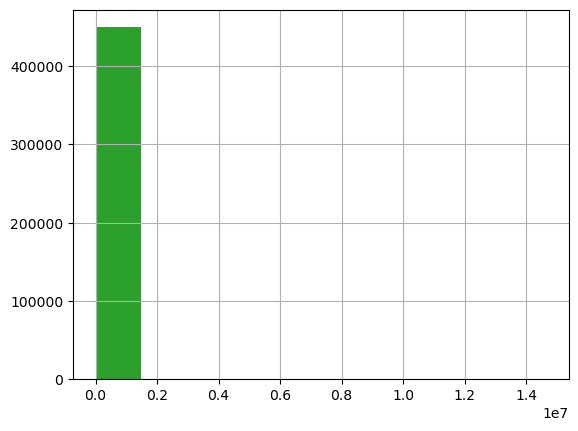

In [55]:
# Import necessary libraries
import pandas as pd

# Load your CSV file
df = pd.read_csv(r"C:\Users\kunnu\Desktop\COMP 8085\Project 1\UNSW-NB15-BALANCED-TRAIN.csv")

# Display the first few rows of the dataframe
print(df.head())

# Get a summary of the dataframe
print(df.info())

# Get descriptive statistics
print(df.describe())

# For categorical columns like 'proto', 'state', 'service', 'attack_cat', 'Label', we can get the count of each category
print(df['proto'].value_counts())
print(df['state'].value_counts())
print(df['service'].value_counts())
print(df['attack_cat'].value_counts())
print(df['Label'].value_counts())

# For numerical columns like 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', we can plot histograms to understand their distribution
df['dur'].hist()
df['sbytes'].hist()
df['dbytes'].hist()
df['sttl'].hist()
df['dttl'].hist()


In [14]:
from sklearn.model_selection import train_test_split

# Assuming `df` is your DataFrame
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)  # for an 80-20 split

# Now you can clean your datasets separately
# clean_train_df = clean_data(train_df)
# clean_val_df = clean_data(val_df)

import pandas as pd

train_df = pd.read_csv('train.csv')
val_df = pd.read_csv('val.csv')

# Now let's start with data cleaning
# Convert categorical attributes to numerical format
for col in ['proto', 'state', 'service']:
    train_df[col], _ = train_df[col].factorize()
    val_df[col], _ = val_df[col].factorize()

# Convert object-formatted columns to string type
for col in ['srcip', 'dstip', 'Stime', 'Ltime']:
    train_df[col] = train_df[col].astype(str)
    val_df[col] = val_df[col].astype(str)


# Save your cleaned data
train_df.to_csv('clean_train1.csv', index=False)
val_df.to_csv('clean_val1.csv', index=False)




C:\Users\kunnu\AppData\Local\Temp\ipykernel_21728\887864195.py:12: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('train.csv')
C:\Users\kunnu\AppData\Local\Temp\ipykernel_21728\887864195.py:13: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  val_df = pd.read_csv('val.csv')


In [56]:
print(5+6)

11


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE

# Read the data
train_df = pd.read_csv('clean_train.csv')

# Print unique values for object-type columns before preprocessing
object_columns = train_df.select_dtypes(include=['object']).columns
for col in object_columns:
    print(f"\nUnique values for {col} before preprocessing:")
    print(train_df[col].unique())

# Replace ' ' values in 'ct_ftp_cmd' with a placeholder value
train_df['ct_ftp_cmd'] = train_df['ct_ftp_cmd'].replace({' ': 'missing'})

# Cast all object-type columns to string type
train_df[object_columns] = train_df[object_columns].astype(str)

# Convert categorical features to numerical using label encoding
label_encoder = LabelEncoder()
for col in train_df.columns:
    if train_df[col].dtype == 'object':
        train_df[col] = label_encoder.fit_transform(train_df[col])

# Print unique values for object-type columns after preprocessing
print("\nUnique values for object-type columns after preprocessing:")
for col in object_columns:
    print(f"\nUnique values for {col} after preprocessing:")
    print(train_df[col].unique())

# Prepare your data
X = train_df.drop(['attack_cat', 'Label'], axis=1)
y_attack_cat = train_df['attack_cat']
y_label = train_df['Label']

# Initialize Random Forest classifiers
rf_classifier_attack_cat = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_label = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifiers to the data
rf_classifier_attack_cat.fit(X, y_attack_cat)
rf_classifier_label.fit(X, y_label)

# Get feature importances for 'attack_cat'
feature_importances_attack_cat = rf_classifier_attack_cat.feature_importances_

# Get feature importances for 'Label'
feature_importances_label = rf_classifier_label.feature_importances_

# Create DataFrames to store feature importances along with column names for 'attack_cat' and 'Label'
feature_importance_df_attack_cat = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_attack_cat})
feature_importance_df_label = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_label})

# Sort features by importance for 'attack_cat'
feature_importance_df_attack_cat = feature_importance_df_attack_cat.sort_values(by='Importance', ascending=False)

# Sort features by importance for 'Label'
feature_importance_df_label = feature_importance_df_label.sort_values(by='Importance', ascending=False)

# Plot feature importances for 'attack_cat'
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_attack_cat['Feature'][:10], feature_importance_df_attack_cat['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for attack_cat')
plt.savefig('feature_importance_attack_cat.png')
plt.show()

# Plot feature importances for 'Label'
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_label['Feature'][:10], feature_importance_df_label['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Label')
plt.savefig('feature_importance_label.png')
plt.show()


# Initialize Random Forest classifiers
rf_classifier_attack_cat = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_label = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform Recursive Feature Elimination (RFE) for 'attack_cat'
rfe_attack_cat = RFE(rf_classifier_attack_cat, n_features_to_select=10)
rfe_attack_cat.fit(X, y_attack_cat)

# Perform Recursive Feature Elimination (RFE) for 'Label'
rfe_label = RFE(rf_classifier_label, n_features_to_select=10)
rfe_label.fit(X, y_label)

# Get selected features for 'attack_cat'
selected_features_attack_cat = X.columns[rfe_attack_cat.support_]

# Get selected features for 'Label'
selected_features_label = X.columns[rfe_label.support_]

# Print selected features for 'attack_cat'
print("Selected features for 'attack_cat':")
print(selected_features_attack_cat)

# Print selected features for 'Label'
print("Selected features for 'Label':")
print(selected_features_label)

# Train the models using selected features
rf_classifier_attack_cat.fit(X[selected_features_attack_cat], y_attack_cat)
rf_classifier_label.fit(X[selected_features_label], y_label)

# Print feature rankings for 'attack_cat'
print("Feature rankings for 'attack_cat':")
print(rfe_attack_cat.ranking_)

# Print feature rankings for 'Label'
print("Feature rankings for 'Label':")
print(rfe_label.ranking_)


C:\Users\kunnu\AppData\Local\Temp\ipykernel_21728\1757462663.py:8: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('clean_train.csv')



Unique values for srcip before preprocessing:
['175.45.176.1' '59.166.0.4' '59.166.0.0' '59.166.0.9' '59.166.0.2'
 '175.45.176.3' '59.166.0.1' '175.45.176.2' '175.45.176.0' '59.166.0.7'
 '59.166.0.5' '59.166.0.6' '59.166.0.8' '149.171.126.15' '149.171.126.14'
 '59.166.0.3' '149.171.126.12' '149.171.126.18' '10.40.85.10'
 '10.40.85.30' '149.171.126.10' '10.40.85.1' '149.171.126.0' '10.40.170.2'
 '10.40.182.1' '149.171.126.2' '10.40.182.6' '149.171.126.7' '10.40.182.3'
 '149.171.126.8' '149.171.126.1' '149.171.126.13' '149.171.126.17'
 '149.171.126.19' '149.171.126.6' '149.171.126.9' '149.171.126.5'
 '149.171.126.3' '149.171.126.4' '192.168.241.243' '149.171.126.11']

Unique values for sport before preprocessing:
[0 52211 57313 ... 40161 42381 20978]

Unique values for dstip before preprocessing:
['149.171.126.17' '149.171.126.7' '149.171.126.1' '149.171.126.8'
 '149.171.126.3' '149.171.126.9' '149.171.126.15' '149.171.126.0'
 '149.171.126.18' '149.171.126.14' '149.171.126.10' '149.171.

KeyboardInterrupt: 

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE

# Read the data
train_df = pd.read_csv('clean_train.csv')

# Replace ' ' values in 'ct_ftp_cmd' with a placeholder value
train_df['ct_ftp_cmd'] = train_df['ct_ftp_cmd'].replace({' ': 'missing'})

# Cast all object-type columns to string type
object_columns = train_df.select_dtypes(include=['object']).columns
train_df[object_columns] = train_df[object_columns].astype(str)

# Convert categorical features to numerical using label encoding
label_encoder = LabelEncoder()
for col in train_df.columns:
    if train_df[col].dtype == 'object':
        train_df[col] = label_encoder.fit_transform(train_df[col])

# Prepare your data
X = train_df.drop(['attack_cat', 'Label'], axis=1)
y_attack_cat = train_df['attack_cat']
y_label = train_df['Label']

# Initialize Random Forest classifiers
rf_classifier_attack_cat = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_label = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform Recursive Feature Elimination (RFE) for 'attack_cat'
rfe_attack_cat = RFE(rf_classifier_attack_cat, n_features_to_select=10)
rfe_attack_cat.fit(X, y_attack_cat)

# Perform Recursive Feature Elimination (RFE) for 'Label'
rfe_label = RFE(rf_classifier_label, n_features_to_select=10)
rfe_label.fit(X, y_label)

# Get selected features for 'attack_cat'
selected_features_attack_cat = X.columns[rfe_attack_cat.support_]

# Get selected features for 'Label'
selected_features_label = X.columns[rfe_label.support_]

# Print selected features for 'attack_cat'
print("Selected features for 'attack_cat':")
print(selected_features_attack_cat)

# Print selected features for 'Label'
print("Selected features for 'Label':")
print(selected_features_label)

# Train the models using selected features
rf_classifier_attack_cat.fit(X[selected_features_attack_cat], y_attack_cat)
rf_classifier_label.fit(X[selected_features_label], y_label)

# Print feature rankings for 'attack_cat'
print("Feature rankings for 'attack_cat':")
print(rfe_attack_cat.ranking_)

# Print feature rankings for 'Label'
print("Feature rankings for 'Label':")
print(rfe_label.ranking_)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE

# Read the data
train_df = pd.read_csv('clean_train.csv')

# Convert all columns to string type
train_df = train_df.astype(str)

# Print unique values for object-type columns before preprocessing
object_columns = train_df.select_dtypes(include=['object']).columns
for col in object_columns:
    print(f"\nUnique values for {col} before preprocessing:")
    print(train_df[col].unique())

# Replace ' ' values in 'ct_ftp_cmd' with a placeholder value
train_df['ct_ftp_cmd'] = train_df['ct_ftp_cmd'].replace({' ': 'missing'})

# Encoding categorical variables
label_encoder = LabelEncoder()
for col in object_columns:
    train_df[col] = label_encoder.fit_transform(train_df[col])

# Print unique values for object-type columns after preprocessing
print("\nUnique values for object-type columns after preprocessing:")
for col in object_columns:
    print(f"\nUnique values for {col} after preprocessing:")
    print(train_df[col].unique())

# Prepare your data
X = train_df.drop(['attack_cat', 'Label'], axis=1)
y_attack_cat = train_df['attack_cat']
y_label = train_df['Label']

# Initialize Random Forest classifiers
rf_classifier_attack_cat = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_label = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifiers to the data
rf_classifier_attack_cat.fit(X, y_attack_cat)
rf_classifier_label.fit(X, y_label)

# Get feature importances for 'attack_cat'
feature_importances_attack_cat = rf_classifier_attack_cat.feature_importances_

# Get feature importances for 'Label'
feature_importances_label = rf_classifier_label.feature_importances_

# Create DataFrames to store feature importances along with column names for 'attack_cat' and 'Label'
feature_importance_df_attack_cat = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_attack_cat})
feature_importance_df_label = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_label})

# Sort features by importance for 'attack_cat'
feature_importance_df_attack_cat = feature_importance_df_attack_cat.sort_values(by='Importance', ascending=False)

# Sort features by importance for 'Label'
feature_importance_df_label = feature_importance_df_label.sort_values(by='Importance', ascending=False)

# Plot feature importances for 'attack_cat'
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_attack_cat['Feature'][:10], feature_importance_df_attack_cat['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for attack_cat')
plt.tight_layout()
plt.savefig('feature_importance_attack_cat.png')

# Plot feature importances for 'Label'
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_label['Feature'][:10], feature_importance_df_label['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Label')
plt.tight_layout()
plt.savefig('feature_importance_label.png')

# Initialize Random Forest classifiers
rf_classifier_attack_cat = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_label = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform Recursive Feature Elimination (RFE) for 'attack_cat'
rfe_attack_cat = RFE(rf_classifier_attack_cat, n_features_to_select=10)
rfe_attack_cat.fit(X, y_attack_cat)

# Perform Recursive Feature Elimination (RFE) for 'Label'
rfe_label = RFE(rf_classifier_label, n_features_to_select=10)
rfe_label.fit(X, y_label)

# Get selected features for 'attack_cat'
selected_features_attack_cat = X.columns[rfe_attack_cat.support_]

# Get selected features for 'Label'
selected_features_label = X.columns[rfe_label.support_]

# Print selected features for 'attack_cat'
print("Selected features for 'attack_cat':")
print(selected_features_attack_cat)

# Print selected features for 'Label'
print("Selected features for 'Label':")
print(selected_features_label)

# Train the models using selected features
rf_classifier_attack_cat.fit(X[selected_features_attack_cat], y_attack_cat)
rf_classifier_label.fit(X[selected_features_label], y_label)

# Print feature rankings for 'attack_cat'
print("Feature rankings for 'attack_cat':")
print(rfe_attack_cat.ranking_)

# Print feature rankings for 'Label'
print("Feature rankings for 'Label':")
print(rfe_label.ranking_)
